<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:6- Model Selection </center></h1></u>

Hello everyone!! Welcome back to the Assignment 6 of the time series module.

![](https://c.tenor.com/2crKC0rsbcIAAAAM/mr-bean-funny.gif)

In this assignment you will be learning how to select the best model for your time series analysis.

<h2><u>Table of Contents:</h2></u>

1. Model Selection<br>
2. What is AIC<br>
3. What is BIC<br>
4. Implementing Model Selection<br>

<h2><u>Model Selection</h2></u>

Model selection is the process of selecting the best model by trying different hyperparameters and selecting the model that gives best performance. In time series analysis we have used auto arima to do so. But what exactly is a "best" model? You are going to study the criteria for selecting the best model in this assignment. <br><br>
Notice that Machine learning people will approach this problem differently, but time series analysis uses statistical methods, hence model selection in time series is also grounded on statistical methods which are AIC and BIC.

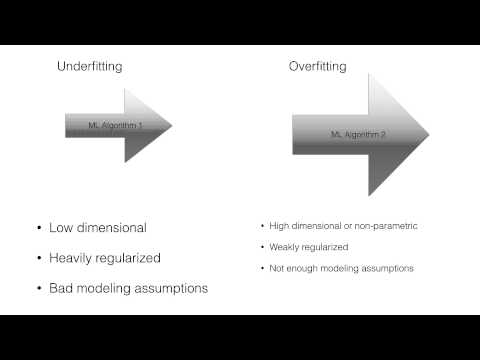

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('gajUDdlBX3w', width=700, height=400)

<h4><u>The Challenge of Model Selection</h4></u>

The process of fitting numerous models to a dataset and selecting one above the others is known as model selection.

This can be applied to both unsupervised and supervised learning, such as selecting a clustering model for a clustering problem or selecting a predictive model for a regression or classification job.
For model selection, there are a variety of ways that can be employed. In supervised learning, for example, the three most frequent methodologies are

* Train, Validation, and Test datasets.
* Resampling methods
* Probabilistic Statistics

![](https://miro.medium.com/max/1196/1*s2NqGsdIg2lXmiDx-cLlcg.png)

* Fitting candidate models on a training set, tweaking them on the validation dataset, and selecting the best model on the test dataset based on a given metric, such as accuracy or error, is the simplest and most reliable technique of model selection. One issue with this method is that it necessitates a large amount of data.

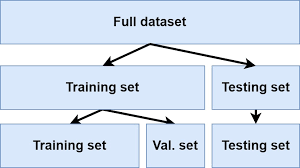

* A good example of resampling methods is k-fold cross-validation, which divides a training set into multiple train/test pairs and fits and evaluates a model on each. This is done for each model, and the model with the best average score across the k-folds is chosen. The difference between this approach and the previous one is that just model performance is evaluated, independent of model complexity.

* A third method of model selection combines the model's complexity and performance into a score, which is then used to select the model that reduces or maximises the score.Because the scoring system uses a probabilistic framework, we might call this approach statistical or probabilistic model selection.

An analytical technique for scoring and choosing among candidate models is probabilistic model selection (or "information criteria").

Models are graded based on their performance on the training dataset as well as the model's complexity.

* **Model performance:** The performance of a candidate model on the training dataset.
* **Model complexity:** After training, how complicated the trained candidate model is.
A probabilistic framework, such as log-likelihood under the paradigm of maximum likelihood estimation, can be used to assess model performance. The number of degrees of freedom or parameters in a model can be used to assess its complexity.

![](https://i0.wp.com/neptune.ai/wp-content/uploads/model-complexity-1.png?resize=383%2C316&ssl=1)

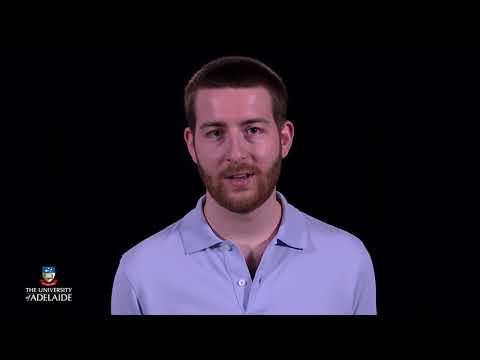

In [2]:
YouTubeVideo('4al2LfJz6Q8', width=700, height=400)

<h2><u>
Akaike Information Criterion</h2></u>

The Akaike Information Criterion, or AIC for short, is a method for scoring and selecting a model. The model with the lowest AIC is selected.<br><br>
The formula for AIC is:<br>
**AIC = 2k- 2l**<br>
where,<br>
k=number of parameters<br>
l=maximum log likelihood

![](https://timeseriesreasoning.files.wordpress.com/2021/06/a6352-1nurn_wtjfpwin0mc6t7myq.png)

* <u>What is log likelihood?</u>

Maximum likelihood estimate is a method for determining values for model parameters. By maximising the likelihood function, it is a statistical approach for estimating the parameters of a probability distribution.

In Maximum Likelihood Estimation, we wish to maximize the probability of observing the data from the joint probability distribution given a specific probability distribution and its parameters, stated formally as:


### watch the below given videos to know about log likelihood


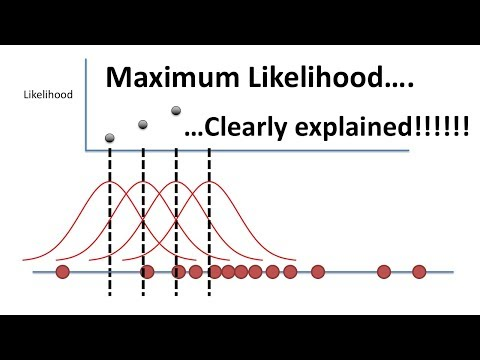

In [3]:
YouTubeVideo('XepXtl9YKwc', width=700, height=400)

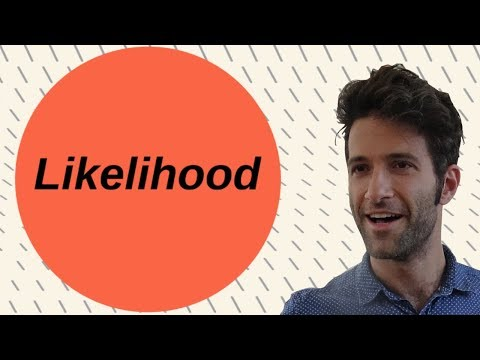

In [4]:
YouTubeVideo('ScduwntrMzc', width=700, height=400)

<h2><u>Bayesian Information Criterion</h2></u>

The formula for BIC is:<br>
**BIC=ln(n)k-2l**
where,<br>
k=number of parameters<br>
l=maximum log likelihood<br>
n=number of samples used for fitting

The model with the lowest BIC is selected.

![](https://miro.medium.com/max/294/1*oRNdu-do4lM_f2putrDKog.png)

Although the quantity determined differs from the AIC, it may be proven to be proportional to it. Unlike the AIC, the BIC penalises models for their complexity, which means that more complex models will have a lower (bigger) score and, as a result, will be less likely to be chosen.

<h2><u>Implementing Model Selection</h2></u>

We will see how AIC and BIC are used to select the best models. For that we will use ARIMA models with different orders.


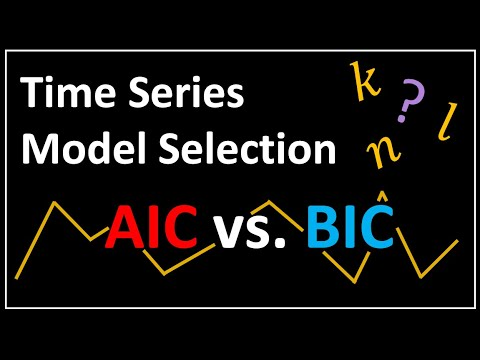

In [5]:
YouTubeVideo('McEN54l3EPU', width=700, height=400)

Lets begin by importing the necessary libraries.

* pandas: for storing and analyzing data
* datetime: for manipulating dates and times.,https://docs.python.org/3/library/datetime.html
* numpy: for array and matrix operations
* matplotlib: for plotting graphs
* plot_acf,plot_pacf: to plot ACF and PACF
* ARIMA: to implement ARIMA model
* adfuller: to implement adf test

In [6]:
#import above mentioned libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA


Next import the warnings library and filter the warnings as 'ignore'

In [7]:
#import warnings
import warnings

#filter warnings
warnings.filterwarnings('ignore')




Now define a parser function that will parse the dates into '%Y-%m-%d' format. Use the datetime.strptime method to do so.

In [8]:
#define parser method
def parser(x):
  return datetime.datetime.strptime(x,'%Y-%m-%d')


Define a function perform_adf_test that will apply the adf test for finding stationarity in the data.

In [9]:
#define function for adf testing
def perform_adf_test(series):

    #apply adfuller to series
    result=adfuller(series)

    #print adf statistic
    print('ADF Statistic: %f' % result[0])

    #print p-value
    print('p-value: %f' % result[1])

    #print critical values
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))



The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [11]:
# import drive from google.colab
from google.colab import drive

# mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


Start by reading and loading the data. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1l3Y0K22BABGnVhcXS7v47SZATHODNavp/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has two columns date and values. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. index_cols attribute is set to 0 which specifies Column(s) to use as the row labels of the DataFrame, either given as string name or column index. Squeeze attribute returns a Series if parsed data only contains one column. date_parser takes the parser function we defined earlier to parse the dates. Next the series is applied the asfreq function which Convert time series to specified frequency.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html

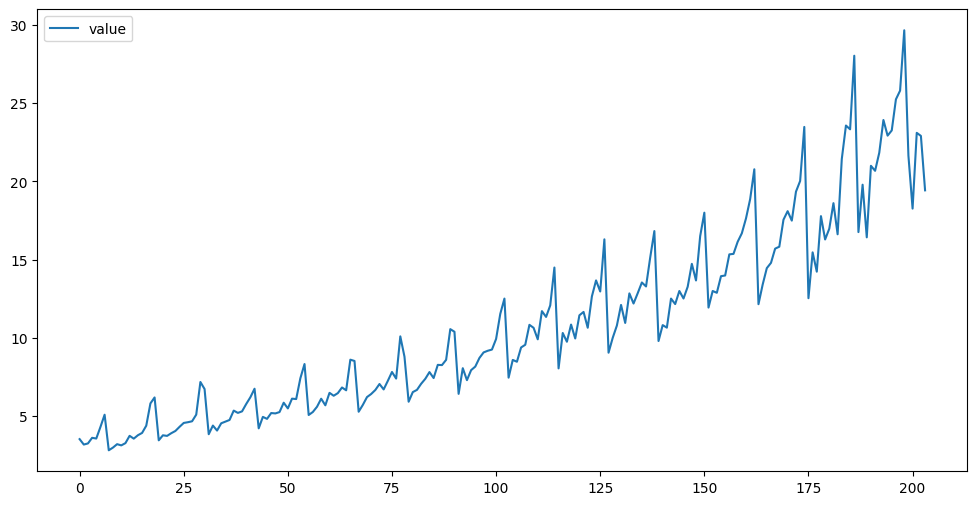

In [13]:
#get dataset link
url= '/content/drug sales.csv'

#read the data
df=pd.read_csv('/content/drug sales.csv')

#apply asfreq to the series
#df=df.asfreq('D')

#plot the data
df.plot(figsize=(12,6))
plt.show()


Lets perform the augmented dickey fuller test by applying the perform_adf_test function created before. This will check whether the data is stationary or not.

In [14]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller function


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [16]:
#check stationarity
series = df['value']  # Assuming 'Value' is the column name containing your time series data
perform_adf_test(series)

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [17]:
#check stationarity
perform_adf_test(series)



ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


The p values is 1.000 which is more than 0.05(significance level) this means that the data is not stationary. Hence lets differentiate the data once and check the p value. use the diff() function to do so and use the dropna() function to remove null values.

In [18]:
#differentiate the series and drop nan values
df['value_diff']=df['value'].diff()
df.dropna(inplace=True)



Now lets again check the stationarity using adf test.

In [19]:
#check stationarity
series = df['value_diff']  # Assuming 'Value' is the column name containing your time series data
perform_adf_test(series)


ADF Statistic: -2.495172
p-value: 0.116653
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


The value is 0.1166 which is still more than 0.05. Hence you have to differentiate the data once more.

In [20]:
#differentiate for second time
df['value_diff_2']=df['value_diff'].diff()
df.dropna(inplace=True)


Again check the p value.

In [21]:
#check stationarity
series = df['value_diff_2']  # Assuming 'Value' is the column name containing your time series data
perform_adf_test(series)


ADF Statistic: -10.292305
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Hurray!! the p value is 0.00 which is less than 0.05. hence the data is now stationary. The next step is to find the p,q values. For that we need to plot the pacf for finding p values and acf for finding q values.

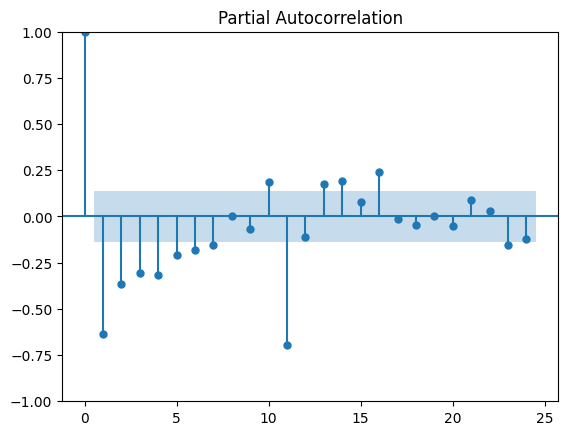

In [22]:
#plot pacf
plot_pacf(df['value_diff_2'])
plt.show()


Hence the values of lags 1,2,3,4,5,6,7,10 are above significance level. Hence these values shall be considered for p values(order of AR).<br> Next plot the acf.

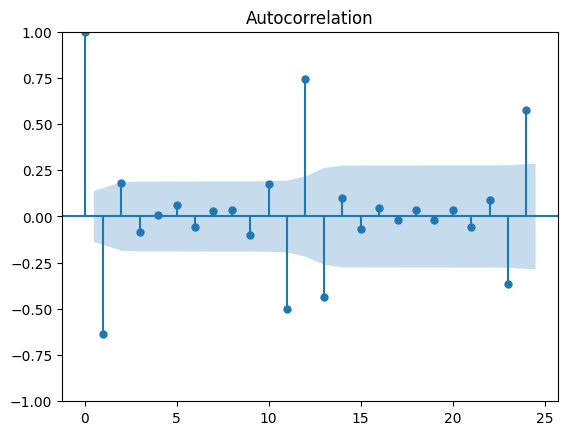

In [23]:
#plot acf
plot_acf(df['value_diff_2'])
plt.show()


Hence the values of lags 1,2 are above significance level. Hence these values shall be considered for q values(order of MA). <br><br>
Next step is the major step to fit the ARIMA models. We will have total 16 values by combining various values of p and q. For that create a list having tuples of p and q combinations. Iterate through these tuple values and create the arima model for that values. Append the fitted model into a dictionary. Refer:https://www.w3schools.com/python/python_dictionaries.asp. And plot the original series as well as the fitted values. ALso print the AIC and BIC scores using the aic and bic methods.

* #### p values(orders of AR):1,2,3,4,5,6,7,10
* #### q values(orders of MA):1,2
* #### d value: 2 (the data was differentiated 2 times)

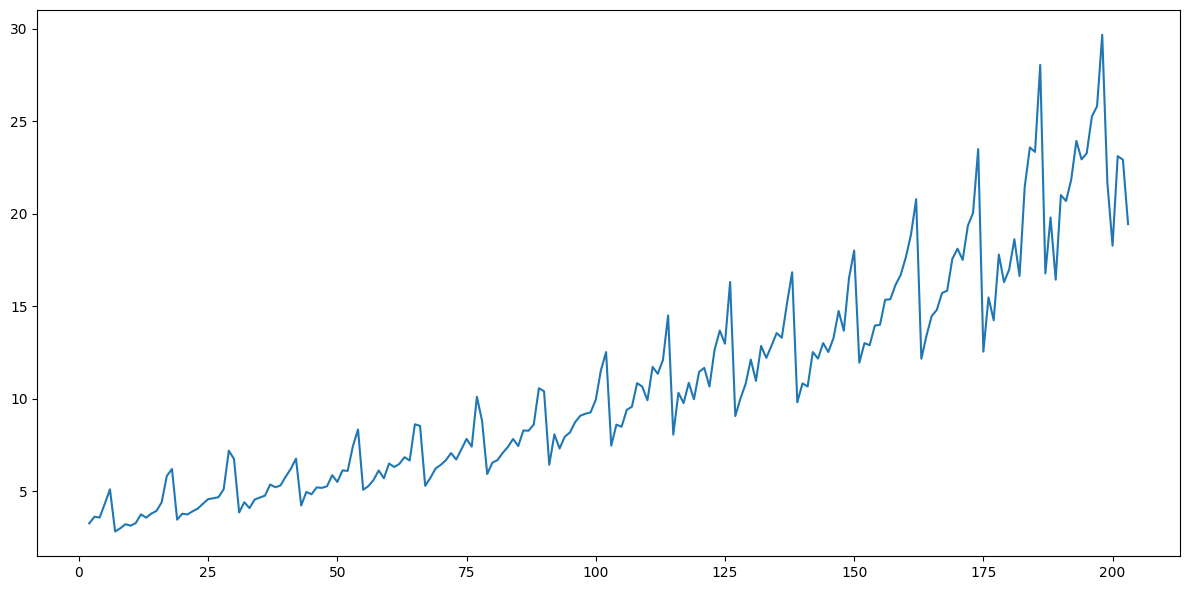

In [25]:
#set figure size
plt.figure(figsize=(12,6))

#plot original series
plt.plot(df['value'],label='original series')


#put p values(orders of AR) in a list
p_values=[1,2,3,4,5,6,7,10]

#put q values(orders of MA) in a list
q_values=[1,2]

#create empty dictionary to store fitted models
fitted_model_dict={}

#create new list for orders
orders=[]

#apply for loop iterating through AR orders
for p in p_values:

  #apply for loop iterating through MA orders
  for q in q_values:

    #append tuple of ar and ma order in new created list
    orders.append((p,2,q))

#create a dictionary
fitted_model_dict={}


#apply for loop through orders
for values in orders:

  #start try block
  try:

    #create ARIMA model
    ar_model=ARIMA(df['value'],order=values)

    #fit the model 'ar_model.fit(transparams=False )'
    ar_model_fit=ar_model.fit(transparams=False)

    #append the fitted model in the dictionary,keep key as tuple of ar and ma orders
    fitted_model_dict[values]=ar_model_fit

    #add the fitted values in the dictionary,keep key as tuple of ar and ma orders
    df['fitted_values_'+str(values)]=ar_model_fit.fittedvalues

    #create subplots
    plt.subplot(2,2,orders.index(values)+1)

    #plot the original series
    plt.plot(df['value'],label='original series')

    #plot the fitted values 'ar_model_fit.fittedvalues'
    plt.plot(df['fitted_values_'+str(values)],label='fitted values')

    #set title
    plt.title('ARIMA'+str(values))

    #set legend
    plt.legend()

    #print AIC 'fitted_model_dict[values].aic'
    print('AIC for ARIMA'+str(values)+': '+str(fitted_model_dict[values].aic))

    #print BIC 'fitted_model_dict[values].bic'
    #print('BIC for ARIMA'+str(values)+': '+str(fitted_model_dict[values].bic))
    print('BIC for AR({0}),MA({1}): {2}'.format(values[0],
                                                values[1],fitted_model_dict[values].bic))


    #print new line
    print('\n')

  #start except block
  except:

    #pass the execution
    pass
plt.tight_layout()





By looking at the AIC and BIC of the models,the lowest AIC and BIC scores are for model AR(10),MA(1)
* AIC for AR(10),MA(1): 910.7040137079978
* BIC for AR(10),MA(1): 953.5821394731222

hence we choose this model as the best model.

In this assignment you learned:

* AIC and BIC
* Implementing AIC and BIC


Keep practising until next assignment comes in. <br><br>

## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![](https://i.pinimg.com/originals/e9/26/78/e9267898700539b0ed1fcf55bf195dfe.gif)